In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# from utils.pixel import *
# from utils.pixel_fun import random_pixel
# from utils.pixel import pixel
import my_utils.pixel as pixel

import importlib
importlib.reload(pixel)


<module 'my_utils.pixel' from '/home/lukas/Documents/ETH/MASTER_THESIS/code/my_utils/pixel.py'>

### Load Data:

In [2]:
WW = True  # only consider 'Winter Wheat' otherwise consider Cereals

if WW:
    path_cov = os.path.join("data/yieldmapping_data", "WW_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "WW_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "WW_yield_tot.csv")
else:
    path_cov = os.path.join("data/yieldmapping_data",
                            "Cereals_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "Cereals_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "Cereals_yield_tot.csv")

d_cov = pd.read_csv(path_cov)
d_met = pd.read_csv(path_met)
d_yie = pd.read_csv(path_yie)

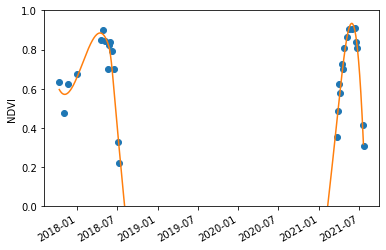

In [3]:
import scipy.interpolate as interpolate
self = pixel.pixel(d_cov, d_met, d_yie)

x, y, xs_np = self.prepare_interpolation(name="test", y=None, ind_keep=None)
t, c, k = interpolate.splrep(x, y, s=0.1, k=3)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
obj = spline(xs_np)
obj = pd.DataFrame(obj, columns=["name"])
self.step_interpolate.join(obj)


self.get_b_spline()
self.plot_ndvi()
self.plot_step_interpolate("BSpline")

### smoothing splines for NDVI:

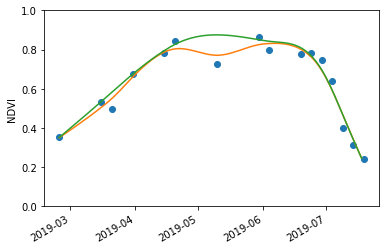

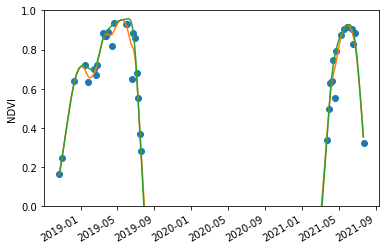

In [4]:
np.random.seed(1)
smooth = 1e-11/(28*24*3600)

for i in range(2):
    temp = pixel.pixel(d_cov, d_met, d_yie)
    temp.get_ndvi()
    temp.plot_ndvi()
    temp.get_smooting_spline(name="all", smooth=smooth)
    temp.get_smooting_spline(name="filter", smooth=smooth,
                             ind_keep=temp.filter("ndvi_min"))
    temp.plot_step_interpolate(which="all")
    temp.plot_step_interpolate(which="filter")
    plt.show()

# print(temp)

# TO DO 
- beautiful plot (colors, legend, title)
- advanced plotting (support for lists)